## Linear Regression

## Learning Objective

- Understand Simple and Multiple linear regression 
- Prepare data for modelling
- Train and validate models
- Interpret model parameters
- Model diagnostics 
- Building regression models using Python package statsmodel.


### Introuduction

Regression is a statistical technique for finding the existence of an association between a dependent variable (aka response variable or outcome variable) and an independent variable (aka explanatory variable or predictor variable).

We can only establish that the change in value of Y is associated with the change in value of X.

Some examples of regression problems are

1. A hospital may be interested in finding how the total treatment cost of a patient varies with the body weight of the patient.
2. Restaurants would like to know the relationship between the customer waiting time after placing the order and the net promoters score (NPS).
3. E-commerce companies such as Amazon, Bigbasket and Flipkart would like to understand the number of customer visits to their portal and the revenue.
4. Banks and other financial institutions would like to understand the impact of unemployment rate on percentage of non-performing assets (NPA).

## Steps in Building a Model

Following are typical steps involved in building a model

#### Collect/Extract Data

- Collect and/or extract data from different data sources. 
- Can be be time-consuming and expensive. 

#### Data preprocessing and exploration
- Data imputation techniques may be used to deal with missing data.  
- Identify the existence of outliers and variability in the dataset. 
- Exploration relationship between the two variables under consideration using various plots.
- Many new variables can be derived and can be used in model building.
- Encode categorical data. 

#### Dividing data into training and validation data sets

- Split data into training data set and validation data set. 
- Proportion of training data is usually between 70% and 80% 
- Remaining data is treated as the validation data. 
- Training and validation sets may be created using random/stratified sampling process.


#### Build the model

- Estimate the regression parameters. 
- Use Ordinary Least Squares (OLS)/Gradient Descent techniues is used to estimate the regression parameters. (Subsequent chapters)

#### Perform Model Diagnostics

- There are certain models assumptions that need to be verified for correctness of the model.
- If the model assumptions are violated, we may have to taken some remedial measures.

#### Validate the Model and measure model accuracy

- Ensure that the model performance is consistent in the validation data set as was in the training data set. 
- It may be necessary, the model may be cross-validated using multiple training and test data sets.

#### Decide on model deployment

- Develop a deployment strategy
- Build actionable items and business rules that can be used by the organization.

The final step in the regression model is to generate actionable items and business rules that can be used by the organization. 

## Simple Linear Regression

Simple Linear Regression (SLR) is a statistical model in which there is only one independent variable and the functional relationship between the dependent variable and the regression coefficient is linear.  

One of the functional forms of SLR is given as follows:

Y = $\beta_{0} + \beta_{1} X+ \epsilon$									
                                                                      
where 

$Y$ is the value of ith observation of the dependent variable in the sample

$X$ is the value of ith observation of the independent variable in the sample

$\epsilon$ is the random error (also known as residuals). $\beta_{0}$ and $\beta_{1}$ are the regression parameters (or regression coefficients)

### Predicting MBA Salary from Grade in 10th

*MBA Salary.csv* contains the salary of 50 graduating MBA students of a Business School in 2016 and their corresponding percentage marks in grade 10. We will develop e SLR(Simple Linear Regression) model to understand and predict salary based the percentage in Grade 10.

In [20]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")
np.set_printoptions(precision=4, linewidth=100)

In [21]:
mba_salary_df = pd.read_csv( 'MBA Salary.csv' )
mba_salary_df.head( 10 )

,S. No.,Percentage in Grade 10,Salary
0,1,62.00,270000
1,2,76.33,200000
2,3,72.00,240000
3,4,60.00,250000
4,5,61.00,180000
5,6,55.00,300000
6,7,70.00,260000
7,8,68.00,235000
8,9,82.80,425000
9,10,59.00,240000


#### More information about the dataset

In [22]:
mba_salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   S. No.                  50 non-null     int64  
 1   Percentage in Grade 10  50 non-null     float64
 2   Salary                  50 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 1.3 KB


### Building  the Model

- *statsmodel* library is used in python for building statistical models. 
- *OLS* api available in *statsmodel.api* module to estimate the regression coefficients for SLR.

- The *OLS()* method does not estimate the intercept by default. 
- If intercept need to be estimated, a constant term of 1 need to be added to X.

In [23]:
import statsmodels.api as sm

X = sm.add_constant( mba_salary_df['Percentage in Grade 10'] )
X.head(5)

,const,Percentage in Grade 10
0,1.0,62.00
1,1.0,76.33
2,1.0,72.00
3,1.0,60.00
4,1.0,61.00


In [24]:
Y = mba_salary_df['Salary']

In [25]:
import matplotlib.pyplot as plt
import seaborn as sn

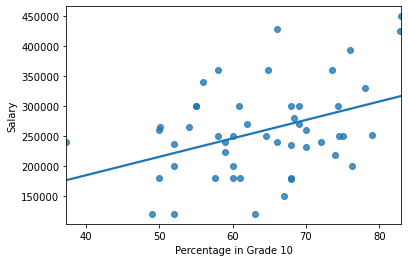

In [26]:
sn.regplot( mba_salary_df['Percentage in Grade 10'], 
            mba_salary_df['Salary'],
            ci=0);

### Splitting the dataset into training and validation sets

- Split the dataset randomly into training and validation datasets *train_test_split()* method from *skelarn.model_selection* module.
The method returns 4 variables, two containing X features for training and test dataset and two for response variable.

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
train_X, test_X, train_y, test_y = train_test_split( X ,
                                                     Y,
                                                    train_size = 0.8,
                                                    random_state = 100 )

In this example,

- *train_X* contains X features of the training dataset
- *train_y* contains the values of response variable for training dataset
- *test_X* contains X features of the test dataset
- *test_y* contains the values of response variable for test dataset


train_size = 0.8 implies 80% of the data is used for training the model and the remaining 20% is used for validating the model 

### Fitting the Model

In [29]:
mba_salary_lm = sm.OLS( train_y, train_X ).fit()

Printing Estimated Parameters and interpreting them

In [30]:
print( mba_salary_lm.params )

const                     30587.285652
Percentage in Grade 10     3560.587383
dtype: float64


The estimated model can be written as 

 **MBA Salary = 30587.285 + 3560.587 * (Percentage in Grade 10)**

The equation can be interpreted as follows: for every one percentage increase in grade 10 marks, the salary of the MBA students will increase at the rate of 3560.587 on an average.

### Model Diagnostics

It is important to validate the regression model to ensure its validity and goodness of fit before it can be used for practical applications. The following measures are used to validate the simple linear regression models:
1. Co-efficient of determination (R-square).
2. Hypothesis test for the regression coefficient.
3. Analysis of Variance for overall model validity (relevant more for multiple linear regression).
4. Residual analysis to validate the regression model assumptions.
5. Outlier analysis.


The method *summary2()* prints the model summary which contains most of the above information required for diagnosing a model.

In [31]:
mba_salary_lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
===================================================================================
Model:                    OLS                   Adj. R-squared:          0.190     
Dependent Variable:       Salary                AIC:                     1008.8680 
Date:                     2021-03-04 14:20      BIC:                     1012.2458 
No. Observations:         40                    Log-Likelihood:          -502.43   
Df Model:                 1                     F-statistic:             10.16     
Df Residuals:             38                    Prob (F-statistic):      0.00287   
R-squared:                0.211                 Scale:                   5.0121e+09
-----------------------------------------------------------------------------------
                         Coef.     Std.Err.    t    P>|t|     [0.025       0.975]  
-----------------------------------------------------------------------------------
const                  30587.2857 71869.4497 0.4256 0.6728 -114904.8089 176079.3802
Percentage in Grade 10  3560.5874  1116.9258 3.1878 0.0029    1299.4892   5821.6855
-----------------------------------------------------------------------------------
Omnibus:                    2.048              Durbin-Watson:                 2.611
Prob(Omnibus):              0.359              Jarque-Bera (JB):              1.724
Skew:                       0.369              Prob(JB):                      0.422
Kurtosis:                   2.300              Condition No.:                 413  
===================================================================================

"""

From the above summary, following conclusion can be derived.

#### Coefficient of Determination (R-Square or R2)

The co-efficient of determination (or R-square or R2) measures the percentage of variation in Y explained by the model.

If SST is the sum of squares of total variation, SSR is the sum of squares of variation explained by the regression model and SSE is the sum of squares of errors or unexplained variation.

Variation in Y (SST) = $\sum_{i=1}^{N}(Y_{i} - \bar{Y})^2$ 

where, 

- $\bar{Y}$ is the mean of Y.
- $Y_{i}$ is the Y value for $i^{th}$ observation
- *N* is the number of observations

Variations explained by the model = $\beta_{0} + \beta_{1} X_{i}$

Unexplained variations (SSE) = $\sum_{i=1}^{N}(Y_{i} - (\beta_{0} + \beta_{1} X_{i}))^2$  

The coefficient of determination is given by

$R^{2}$ = 1 - $\frac{SSE}{SST}$

Thus, R2 is the proportion of variation in response variable Y explained by the regression model.

- The value of R2 lies between 0 and 1.
- There is no minimum threshold for R2; higher value of R2 implies better fit. 

The above model summary says the r-squared value is 0.211. The model explains 21.1% of the variance in Y.

#### Hypothesis Test for Regression Co-efficient & Analysis of Variance (F-test)

In [32]:
mba_salary_lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
===================================================================================
Model:                    OLS                   Adj. R-squared:          0.190     
Dependent Variable:       Salary                AIC:                     1008.8680 
Date:                     2021-03-04 14:20      BIC:                     1012.2458 
No. Observations:         40                    Log-Likelihood:          -502.43   
Df Model:                 1                     F-statistic:             10.16     
Df Residuals:             38                    Prob (F-statistic):      0.00287   
R-squared:                0.211                 Scale:                   5.0121e+09
-----------------------------------------------------------------------------------
                         Coef.     Std.Err.    t    P>|t|     [0.025       0.975]  
-----------------------------------------------------------------------------------
const                  30587.2857 71869.4497 0.4256 0.6728 -114904.8089 176079.3802
Percentage in Grade 10  3560.5874  1116.9258 3.1878 0.0029    1299.4892   5821.6855
-----------------------------------------------------------------------------------
Omnibus:                    2.048              Durbin-Watson:                 2.611
Prob(Omnibus):              0.359              Jarque-Bera (JB):              1.724
Skew:                       0.369              Prob(JB):                      0.422
Kurtosis:                   2.300              Condition No.:                 413  
===================================================================================

"""


The p-value of 0.0029 indicates the the coefficients estimated for the variable *Percentage in Grade 10* is correct. Also, the probability value of F-statistics of the model is 0.00287 indicates that the overall model is correct and can be used.

#### Residual Anlalysis

Residual (error) analysis is important to check whether the assumptions of regression models have been satisfied. It is performed to check the following:
1.	The residuals are normally distributed.
2.	The variance of residual is constant (homoscedasticity).
3.	The functional form of regression is correctly specified.
4.	If there are any outliers.


The P-P plot compares the cumulative distribution function of two probability distributions against each other.  In the current context, we use the P-P plot to check whether the distribution of the residual matches with that of a normal distribution.

*ProbPlot()* on statsmodel draws the P-P plot.

<Figure size 576x432 with 0 Axes>

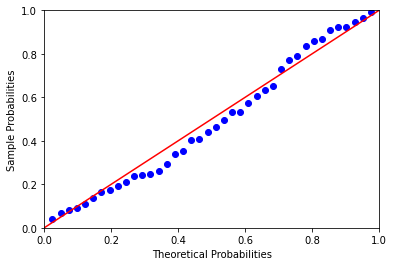

In [92]:
probplot = sm.ProbPlot( mba_salary_lm.resid, fit = True )
plt.figure( figsize = (8, 6) )
probplot.ppplot( line='45' )
plt.show();

- The diagonal line is the cumulative distribution of a normal distribution, whereas the dots represent the cumulative distribution of the residuals. 
- Since the dots are close to the diagonal line, we can conclude that the residuals follow an approximate normal distribution 
- We need only an approximate normal distribution

#### Test of Homoscedasticity

- An important assumption of regression model is that the residuals have constant variance (homoscedasticity) across different values of the explanatory variable (X). That is, the variance of residuals is assumed to be independent of variable X. 

- This can be observed by drawing a residual plot, which is a plot between standardized residual and standardized predicted values. If there is heteroscedasticity (non-constant variance of residuals) then a funnel type shape in the residual plot can be expected.

The following method creates the standardized values of a series of values (variable).

In [93]:
def get_standardized_values( vals ):    
    return (vals - vals.mean())/vals.std()

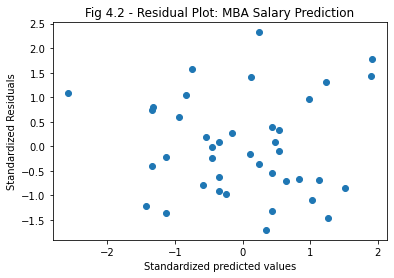

In [94]:
plt.scatter( get_standardized_values( mba_salary_lm.fittedvalues ), 
            get_standardized_values( mba_salary_resid ) )
plt.title( "Fig 4.2 - Residual Plot: MBA Salary Prediction" );
plt.xlabel( "Standardized predicted values")
plt.ylabel( "Standardized Residuals");

It can be observed that the residuals are random and have no funnel shape, which means the residuals have constant variance (homoscedasticity).

### Outlier Analysis

Outliers are observations whose values show a large deviation from mean value. Presence of an outlier can have significant influence on values of regression coefficients. Thus, it is important to identify the existence of outliers in the data.

The following distance measures are useful in identifying the influential observations:
1.	Z-Score
2.	Cook’s Distance

**Z-Score**

Z-score is the standardized distance of an observation from its mean value. For the predicted value of the dependent variable Y, the Z-score is given by

z = $\frac{\hat{Y_{i}} - \bar{Y}}{\sigma_{Y}}$

where,

- $\hat{Y_{i}}$ - Predicted value of Y for $i^{th}$ observation
- $\bar{Y}$ - Mean or expected value of Y
- $\sigma_{Y}$ - Variance of Y

Any observation with a Z-score of more than 3 may be flagged as outlier.

In [95]:
from scipy.stats import zscore

In [96]:
mba_salary_df['z_score_salary'] = zscore( mba_salary_df.Salary )

In [97]:
mba_salary_df[ (mba_salary_df.z_score_salary > 3.0) | (mba_salary_df.z_score_salary < -3.0) ]

,S. No.,Percentage in Grade 10,Salary,z_score_salary


So, there are no observations, which are outliers as per the z-score.

**Cook's Distance**

Cook’s distance measures how much the predicted value of the dependent variable changes for all the observations in the sample when a particular observation is excluded from sample for the estimation of regression parameters.

A Cook’s distance value of more than 1 indicates highly influential observation.

*get_influence()* returns the influence of observations in the model and *cook_distance* variable provide the cook's distance measures. 
Then the distances can be plotted to against the observation index to find out which ones are influentials.

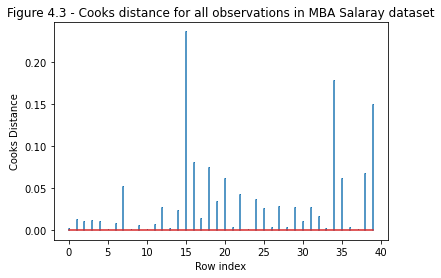

In [40]:
import numpy as np

mba_influence = mba_salary_lm.get_influence()
(c, p) = mba_influence.cooks_distance

plt.stem( np.arange( len( train_X) ), 
         np.round( c, 3 ), 
         markerfmt="," );
plt.title( "Figure 4.3 - Cooks distance for all observations in MBA Salaray dataset" );
plt.xlabel( "Row index")
plt.ylabel( "Cooks Distance");

It can be observed that none of the observation's cook's distance does not exceed 1 and hence none of them are outliers.

### Making prediction using the model

#### Predicting on validation set 

The model variable has a method *predict()*, which takes the X parameters and returns the predicted values.

In [42]:
pred_y = mba_salary_lm.predict( test_X )

### Measuring Accuracy

*sklearn.metrics* has *r2_score* and *mean_squared_error* for measuring r squared and MSE values. We need to take square root of the MSE value to get RMSE value.

MSE = $\frac{1}{n}\sum_{i=1}^{N}(Y_{i} - (\beta_{0} + \beta_{1} X_{i}))^2$ 


RMSE = $\sqrt \frac{1}{n}\sum_{i=1}^{N}(Y_{i} - (\beta_{0} + \beta_{1} X_{i}))^2$ 

In [43]:
from sklearn.metrics import r2_score, mean_squared_error

In [44]:
np.abs(r2_score(test_y, pred_y))

0.156645849742304

So, the model only explains the 15.6% of the variance in the validation set.

In [45]:
import numpy

In [46]:
np.sqrt(mean_squared_error(test_y, pred_y))

73458.04348346895

*RMSE* means at an average what error the model makes while making a prediction. The smaller the value of RMSE, the better it is.

## Multiple Linear Regression

Multiple linear regression (MLR) is a statistical technique for finding existence of an association relationship between a dependent variable (aka response variable or outcome variable) and several independent variables (aka explanatory variables or predictor variable).

The functional form of MLR is given by

$Y = \beta_{0} + \beta_{1} X_{1}+ \beta_{2} X_{2}+ ... + \beta_{n} X_{n}+\epsilon_{}$


Where $Y_{i}$ is the value of response variable of the $i^{th}$ observation and $X_{1}$, $X_{2}$,.., $X_{n}$ are *n* explanatory variables. 

The regression coefficients $\beta_{1}, \beta_{1}, …, \beta_{n}$ are called partial regression coefficients since the relationship between an explanatory variable and the response variable is calculated after removing the effect all the other explanatory variables in the model.

### Predicting the *SOLD PRICE* of players in IPL Auction

| Data Code | Description |
| ----------:| :-------------- |
| AGE |		Age of the player at the time of auction classified into 3 categories.  Category 1  (L25) means the player is less than 25 years old, 2 means that the age is between 25 and 35 years (B25-35)and category 3 means that the age is more than 35 (A35).  |
| RUNS-S |		Number of runs scored by a player |
| RUNS-C |		Number of runs conceded by a player |
| HS |		Highest score by a batsman in IPL |
| AVE-B |		Average runs scored by a batsman in IPL |
| AVE-BL |		Bowling average (Number of runs conceded / number of wickets taken) in IPL. |
| SR-B |		Batting strike rate (ratio of the number of runs scored to the number of balls faced) in IPL |
| SR-BL |		Bowling strike rate (ratio of the number of balls bowled to the number of wickets taken) in IPL |
| SIXERS |		Number of six runs scored by a player in IPL  |
| WKTS |		Number of wickets taken by a player in IPL |
| ECON |		Economy rate of a bowler (number of runs conceded by the bowler per over) in IPL |
| CAPTAINCY EXP |		Captained either an T20 team or a national team |
| ODI-SR-B |		Batting strike rate in One Day Internationals |
| ODI-SR-BL |		Bowling strike rate in One Day Internationals |
| ODI-RUNS-S |		Runs scored in One Day Internationals |
| ODI-WKTS |		Wickets taken in One Day Internationals |
| T-RUNS-S |		Runs scored in Test matches |
| T-WKTS |		Wickets taken in Test matches |
| PLAYER-SKILL |		Player’s primary skill (batsman, bowler, or all-rounder) |
| COUNTRY |		Country of origin of the player (AUS: Australia; IND: India; PAK: Pakistan; SA: South Africa; SL: Sri Lanka; NZ: New Zealand; WI: West Indies; OTH: Other countries) |
| YEAR-A |		Year of Auction in IPL |
| IPL TEAM |		Team(s) for which the player had played in the IPL (CSK: Chennai Super Kings; DC: Deccan Chargers; DD: Delhi Daredevils; KXI: Kings XI Punjab; KKR: Kolkata Knight Riders; MI: Mumbai Indians; PWI: Pune Warriors India; RR: Rajasthan Royals; RCB: Royal Challengers Bangalore). A + sign was used to indicate that the player had played for more than one team. For example, CSK+ would mean that the player had played for CSK as well as for one or more other teams.  |

#### Loading the dataset

In [104]:
ipl_auction_df = pd.read_csv( 'IPL IMB381IPL2013.csv' )

In [105]:
ipl_auction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sl.NO.         130 non-null    int64  
 1   PLAYER NAME    130 non-null    object 
 2   AGE            130 non-null    int64  
 3   COUNTRY        130 non-null    object 
 4   TEAM           130 non-null    object 
 5   PLAYING ROLE   130 non-null    object 
 6   T-RUNS         130 non-null    int64  
 7   T-WKTS         130 non-null    int64  
 8   ODI-RUNS-S     130 non-null    int64  
 9   ODI-SR-B       130 non-null    float64
 10  ODI-WKTS       130 non-null    int64  
 11  ODI-SR-BL      130 non-null    float64
 12  CAPTAINCY EXP  130 non-null    int64  
 13  RUNS-S         130 non-null    int64  
 14  HS             130 non-null    int64  
 15  AVE            130 non-null    float64
 16  SR-B           130 non-null    float64
 17  SIXERS         130 non-null    int64  
 18  RUNS-C    

There are 130 observations and 26 columns and no missing values.

#### Displaying the first 5 records

As the number of columns are very large, we will display the initial 13 columns first and then the rest of the columns for the first 5 rows.

In [106]:
ipl_auction_df.iloc[0:5, 0:10]

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93


In [107]:
X_features = ipl_auction_df.columns

In [108]:
X_features = ['AGE', 'COUNTRY', 'PLAYING ROLE',
              'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 
              'ODI-WKTS', 'ODI-SR-BL', 'CAPTAINCY EXP', 'RUNS-S', 
              'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 
              'AVE-BL', 'ECON', 'SR-BL']

Most of the features are numerical where as features like *AGE, COUNTRY, PLAYING ROLE, CAPTAINCY EXP* are categorical and hence need to be encoded, before building the model.

### Encoding Categorical Features

Qualitative variables or categorical variables need to be converted using dummy variables before incorporating them in regression model. For example *PLAYING ROLE* which contains values like ,

In [109]:
ipl_auction_df['PLAYING ROLE'].unique()

array(['Allrounder', 'Bowler', 'Batsman', 'W. Keeper'], dtype=object)

In [110]:
pd.get_dummies(ipl_auction_df['PLAYING ROLE'])[0:5]

,Allrounder,Batsman,Bowler,W. Keeper
0,1,0,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,1,0,0


Whenever, we have n levels (or categories) for a qualitative variable (categorical variable), we will use (n - 1) dummy variables, to avoid multi-collinearity (will be discussed later). 

In [111]:
categorical_features = ['AGE', 'COUNTRY', 'PLAYING ROLE', 'CAPTAINCY EXP']

In [112]:
ipl_auction_encoded_df = pd.get_dummies( ipl_auction_df[X_features], 
                                        columns = categorical_features,
                                        drop_first = True )

In [113]:
ipl_auction_encoded_df.columns

Index(['T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL',
       'ECON', 'SR-BL', 'AGE_2', 'AGE_3', 'COUNTRY_BAN', 'COUNTRY_ENG',
       'COUNTRY_IND', 'COUNTRY_NZ', 'COUNTRY_PAK', 'COUNTRY_SA', 'COUNTRY_SL',
       'COUNTRY_WI', 'COUNTRY_ZIM', 'PLAYING ROLE_Batsman',
       'PLAYING ROLE_Bowler', 'PLAYING ROLE_W. Keeper', 'CAPTAINCY EXP_1'],
      dtype='object')

Now, the columns contain the new dummy variables created. We can reassign the new features to the variable *X_features*, which we created earlier to keep track of all features that will be used to build the model finally.

In [114]:
X_features = ipl_auction_encoded_df.columns

### Splitting the dataset into train and validation sets

In [115]:
X = sm.add_constant( ipl_auction_encoded_df )
Y = ipl_auction_df['SOLD PRICE']

train_X, test_X, train_y, test_y = train_test_split( X ,
                                                     Y,
                                                    train_size = 0.8,
                                                    random_state = 42 )

### Building the model on training dataset

In [116]:
ipl_model_1 = sm.OLS(train_y, train_X).fit()
ipl_model_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
========================================================================================
Model:                     OLS                     Adj. R-squared:            0.362     
Dependent Variable:        SOLD PRICE              AIC:                       2965.2841 
Date:                      2021-03-04 15:05        BIC:                       3049.9046 
No. Observations:          104                     Log-Likelihood:            -1450.6   
Df Model:                  31                      F-statistic:               2.883     
Df Residuals:              72                      Prob (F-statistic):        0.000114  
R-squared:                 0.554                   Scale:                     1.1034e+11
----------------------------------------------------------------------------------------
                          Coef.       Std.Err.     t    P>|t|     [0.025       0.975]   
----------------------------------------------------------------------------------------
const                   375827.1991 228849.9306  1.6422 0.1049  -80376.7996  832031.1978
T-RUNS                     -53.7890     32.7172 -1.6441 0.1045    -119.0096      11.4316
T-WKTS                    -132.5967    609.7525 -0.2175 0.8285   -1348.1162    1082.9228
ODI-RUNS-S                  57.9600     31.5071  1.8396 0.0700      -4.8482     120.7681
ODI-SR-B                  -524.1450   1576.6368 -0.3324 0.7405   -3667.1130    2618.8231
ODI-WKTS                   815.3944    832.3883  0.9796 0.3306    -843.9413    2474.7301
ODI-SR-BL                 -773.3092   1536.3334 -0.5033 0.6163   -3835.9338    2289.3154
RUNS-S                     114.7205    173.3088  0.6619 0.5101    -230.7643     460.2054
HS                       -5516.3354   2586.3277 -2.1329 0.0363  -10672.0855    -360.5853
AVE                      21560.2760   7774.2419  2.7733 0.0071    6062.6080   37057.9439
SR-B                     -1324.7218   1373.1303 -0.9647 0.3379   -4062.0071    1412.5635
SIXERS                    4264.1001   4089.6000  1.0427 0.3006   -3888.3685   12416.5687
RUNS-C                      69.8250    297.6697  0.2346 0.8152    -523.5687     663.2187
WKTS                      3075.2422   7262.4452  0.4234 0.6732  -11402.1778   17552.6622
AVE-BL                    5182.9335  10230.1581  0.5066 0.6140  -15210.5140   25576.3810
ECON                     -6820.7781  13109.3693 -0.5203 0.6045  -32953.8282   19312.2721
SR-BL                    -7658.8094  14041.8735 -0.5454 0.5871  -35650.7726   20333.1539
AGE_2                  -230767.6463 114117.2005 -2.0222 0.0469 -458256.1279   -3279.1648
AGE_3                  -216827.0808 152246.6232 -1.4242 0.1587 -520325.1772   86671.0155
COUNTRY_BAN            -122103.5196 438719.2796 -0.2783 0.7816 -996674.4194  752467.3801
COUNTRY_ENG             672410.7654 238386.2220  2.8207 0.0062  197196.5172 1147625.0135
COUNTRY_IND             155306.4011 126316.3449  1.2295 0.2229  -96500.6302  407113.4325
COUNTRY_NZ              194218.9120 173491.9293  1.1195 0.2667 -151630.9280  540068.7521
COUNTRY_PAK              75921.7670 193463.5545  0.3924 0.6959 -309740.7804  461584.3143
COUNTRY_SA               64283.3894 144587.6773  0.4446 0.6579 -223946.8775  352513.6563
COUNTRY_SL               17360.1530 176333.7497  0.0985 0.9218 -334154.7526  368875.0586
COUNTRY_WI               10607.7792 230686.7892  0.0460 0.9635 -449257.9303  470473.4887
COUNTRY_ZIM            -145494.4793 401505.2815 -0.3624 0.7181 -945880.6296  654891.6710
PLAYING ROLE_Batsman     75724.7643 150250.0240  0.5040 0.6158 -223793.1844  375242.7130
PLAYING ROLE_Bowler      15395.8752 126308.1272  0.1219 0.9033 -236394.7744  267186.5249
PLAYING ROLE_W. Keeper  -71358.6280 213585.7444 -0.3341 0.7393 -497134.0278  354416.7718
CAPTAINCY EXP_1         164113.3972 123430.6353  1.3296 0.1878  -81941.0772  410167.8716
----------------------------------------------------------------

As per the p_value (<0.05), only the features *HS*, *AGE_2*, *AVE* and *COUNTRY_ENG* have come out significant.

#### Removing multi-collinearity

- When the dataset has a large number of independent variables, it is possible that few of these independent variables may be highly correlated. 
- Existence of high correlation between independent variables is called multi-collinearity. 
- Presence of multi-collinearity can destabilize the multiple regression model. 
- Thus, it is necessary to identify the presence of multi-collinearity and take corrective actions. 

To find multi-collinearity, a regression model between the explanatory variables. For example, between $X_{1}$ and $X_{2}$.

$X_{1} = \alpha_{0} + \alpha_{0}X_{2}$

and let's say $R_{12}$ is the r-squared value of this model. Then Variance inflation factor (VIF), which is a measure of multi-collinearity can be given by,

$VIF = \frac{1}{(1 - R_{12}^2)}$

- If the variables explain each other, then As $R_{12}$ will increase and inflate the VIF value. 
- VIF value of greater than 4 requires further investigation to assess the impact of multi-collinearity. 
- One  approach to eliminate multi-collinearity is to remove one of the variables from the model building. 

*variance_inflation_factor()* of *statsmodels.stats.outliers_influence*. The following method is written to calculate VIF and assign the VIF to the columns and return a dataframe.  

In [123]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif_factors( X ):
    X_matrix = X.to_numpy()
    vif = [ variance_inflation_factor( X_matrix, i ) for i in range( X_matrix.shape[1] ) ]
    vif_factors = pd.DataFrame()
    vif_factors['column'] = X.columns
    vif_factors['vif'] = vif
    
    return vif_factors

Now, calling the above method with the X features will return the VIF for the corresponding columns.

In [124]:
vif_factors = get_vif_factors( X[X_features] )
vif_factors

,column,vif
0,T-RUNS,12.612694
1,T-WKTS,7.679284
2,ODI-RUNS-S,16.426209
3,ODI-SR-B,13.829376
4,ODI-WKTS,9.951800
5,ODI-SR-BL,4.426818
6,RUNS-S,16.135407
7,HS,22.781017
8,AVE,25.226566
9,SR-B,21.576204


#### Checking correlation of columns with large VIFs

We can generate a correlation heatmap to understand corrrelation between variables and which ones could be selected and which ones could eliminated. We will first select the features that have *VIF* more than 4.

In [125]:
columns_with_large_vif = vif_factors[vif_factors.vif > 4].column

Then plot the heapmap for the features with VIF more than 4.

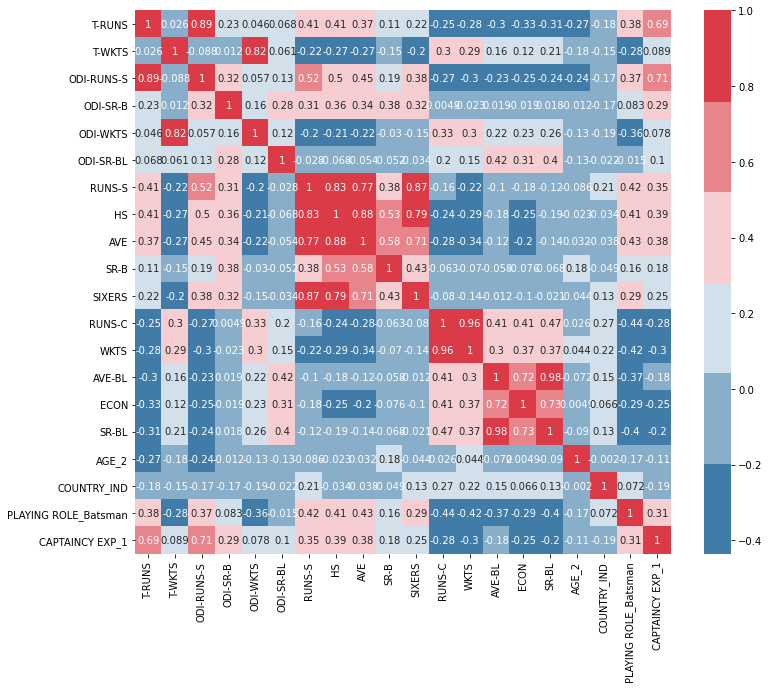

In [129]:
plt.figure( figsize = (12,10) )
sn.heatmap( X[columns_with_large_vif].corr(), 
            annot = True,
            cmap = sn.diverging_palette(240, 10));

The following are the observations from the heatmap.

- *T-RUNS* and *ODI-RUNS-S* are highly correlated, where are *ODI-WKTS* and *T-WKTS* are highly correlated. 
- batsman features like *RUNS-S*, *HS*, *AVE*, *SIXERS* are highly correlated, while bowlers features like *AVE-BL*, *ECON* and *SR-BL* are highly correlated.

To avoid multi-collinearity, we can keep only one column from each group of highly correlated variables and remove the others. Which one to keep and which one to remove, depends on understanding of the data and the problem. 

We have decided to remove the following features. Please note that it may take multiple iterations before actually  deciding at a final set of variables, which do not have multi-collinearity. These iterations have been ommited here for simplicity.

In [130]:
columns_to_be_removed = ['T-RUNS', 'T-WKTS', 'RUNS-S', 'HS', 
                         'AVE', 'RUNS-C', 'SR-B', 'AVE-BL', 
                         'ECON', 'ODI-SR-B', 'ODI-RUNS-S', 'AGE_2', 'SR-BL']

In [131]:
X_new_features = list( set(X_features) - set(columns_to_be_removed) )

In [132]:
get_vif_factors( X[X_new_features] )

,column,vif
0,COUNTRY_NZ,1.173418
1,COUNTRY_WI,1.194093
2,WKTS,2.883101
3,ODI-WKTS,2.742889
4,ODI-SR-BL,2.822148
5,COUNTRY_PAK,1.334773
6,COUNTRY_ENG,1.131869
7,COUNTRY_IND,3.144668
8,CAPTAINCY EXP_1,2.458745
9,COUNTRY_BAN,1.094293


The VIFs on the final set of variables indicate that there is no multi-collinearity present any more. We can proceed to building the model with these set of variables now.

#### Building a new model after removing multicollinearity

In [133]:
train_X = train_X[X_new_features]

ipl_model_2 = sm.OLS(train_y, train_X).fit()
ipl_model_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
========================================================================================
Model:                      OLS                Adj. R-squared (uncentered):   0.728     
Dependent Variable:         SOLD PRICE         AIC:                           2965.1080 
Date:                       2021-03-04 15:13   BIC:                           3012.7070 
No. Observations:           104                Log-Likelihood:                -1464.6   
Df Model:                   18                 F-statistic:                   16.49     
Df Residuals:               86                 Prob (F-statistic):            1.13e-20  
R-squared (uncentered):     0.775              Scale:                         1.2071e+11
----------------------------------------------------------------------------------------
                          Coef.       Std.Err.     t    P>|t|     [0.025       0.975]   
----------------------------------------------------------------------------------------
COUNTRY_NZ              142968.8843 151841.7382  0.9416 0.3491 -158882.5009  444820.2695
COUNTRY_WI              -22234.9315 213050.5847 -0.1044 0.9171 -445765.4766  401295.6135
WKTS                      2431.8988   2105.3524  1.1551 0.2512   -1753.4033    6617.2008
ODI-WKTS                   772.4088    470.6354  1.6412 0.1044    -163.1834    1708.0009
ODI-SR-BL                  909.0021   1267.4969  0.7172 0.4752   -1610.6983    3428.7026
COUNTRY_PAK             122810.2480 159600.8063  0.7695 0.4437 -194465.6541  440086.1502
COUNTRY_ENG             682934.7166 216150.8279  3.1595 0.0022  253241.0920 1112628.3411
COUNTRY_IND             282829.8091  96188.0292  2.9404 0.0042   91614.3356  474045.2827
CAPTAINCY EXP_1         208376.6957  98128.0284  2.1235 0.0366   13304.6315  403448.7600
COUNTRY_BAN            -108758.6040 369274.1916 -0.2945 0.7691 -842851.4010  625334.1930
PLAYING ROLE_W. Keeper  -55121.9240 169922.5271 -0.3244 0.7464 -392916.7280  282672.8801
COUNTRY_ZIM             -67977.6781 390859.9289 -0.1739 0.8623 -844981.5006  709026.1444
PLAYING ROLE_Bowler     -18315.4968 106035.9664 -0.1727 0.8633 -229108.0215  192477.0279
PLAYING ROLE_Batsman    121382.0570 106685.0356  1.1378 0.2584  -90700.7746  333464.8886
AGE_3                    -8950.6659  98041.9325 -0.0913 0.9275 -203851.5772  185950.2453
SIXERS                    7862.1259   2086.6101  3.7679 0.0003    3714.0824   12010.1694
COUNTRY_SA              108735.9086 115092.9596  0.9448 0.3474 -120061.3227  337533.1399
COUNTRY_SL               55912.3398 142277.1829  0.3930 0.6953 -226925.3388  338750.0184
----------------------------------------------------------------------------------------
Omnibus:                       8.635               Durbin-Watson:                  2.252
Prob(Omnibus):                 0.013               Jarque-Bera (JB):               8.345
Skew:                          0.623               Prob(JB):                       0.015
Kurtosis:                      3.609               Condition No.:                  1492 
========================================================================================
* The condition number is large (1e+03). This might indicate             strong
multicollinearity or other numerical problems.
"""

The *p values* of the coefficients estimated shows if the variables are statistically significant in influencing response variables or not. If the *p value* is less than 0.05 than it is statistically  significant otherwise it is not.

So as the above model's p values, only the variables *COUNTRY_IND*, *COUNTRY_ENG*, *SIXERS*, *CAPTAINCY EXP_1* have come out statistically significant. So the features that decide the *SOLD PRICE* are 

- whether the players belongs to india or England 
- how many sixes the player has hit in previous versions of the IPL 
- how many wickets taken by the player in ODIs. 
- whether the player has any previous captaincy experience or not.

Let's create a new list called *significant_vars* to store the column names of significant variabels and build a new model.

In [134]:
significant_vars = ['COUNTRY_IND', 'COUNTRY_ENG', 'SIXERS', 'CAPTAINCY EXP_1']

train_X = train_X[significant_vars]

ipl_model_3 = sm.OLS(train_y, train_X).fit()
ipl_model_3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.704     
Dependent Variable:     SOLD PRICE       AIC:                         2961.8089 
Date:                   2021-03-04 15:14 BIC:                         2972.3864 
No. Observations:       104              Log-Likelihood:              -1476.9   
Df Model:               4                F-statistic:                 62.77     
Df Residuals:           100              Prob (F-statistic):          1.97e-26  
R-squared (uncentered): 0.715            Scale:                       1.3164e+11
--------------------------------------------------------------------------------
                     Coef.      Std.Err.    t    P>|t|     [0.025      0.975]   
--------------------------------------------------------------------------------
COUNTRY_IND       387890.2538  63007.1511 6.1563 0.0000 262885.8606  512894.6471
COUNTRY_ENG       731833.6386 214164.4988 3.4172 0.0009 306937.3727 1156729.9045
SIXERS              8637.8344   1675.1313 5.1565 0.0000   5314.4216   11961.2472
CAPTAINCY EXP_1   359725.2741  74930.3460 4.8008 0.0000 211065.6018  508384.9463
--------------------------------------------------------------------------------
Omnibus:                   1.130             Durbin-Watson:                2.238
Prob(Omnibus):             0.568             Jarque-Bera (JB):             0.874
Skew:                      0.223             Prob(JB):                     0.646
Kurtosis:                  3.046             Condition No.:                165  
================================================================================

"""

The observations can be derived from the latest model *ipl_model_3* 

- All the variables are statistically significant, as *p value* are less than 0.05
- The overall model is siginificant as *p value* for the F-statistics is also less than 0.05
- The model can explain 71.5% of the variance in *SOLD PRICE* as the r-squared value of 0.715.
- And adjusted R squared value is 0.704

### Residual Analysis

#### P-P Plot

As per the assumption, the residuals should be normally distributed and can be verified using P-P plot. We will develop a method called *draw_pp_plot()*, which takes the model and draws the P-P plot, so the it can be used in future.

In [137]:
def draw_pp_plot( model, title ):
    probplot = sm.ProbPlot( model.resid, fit = True );
    plt.figure( figsize = (8, 6) );
    probplot.ppplot( line='45' );
    plt.title( title );
    plt.show();

<Figure size 576x432 with 0 Axes>

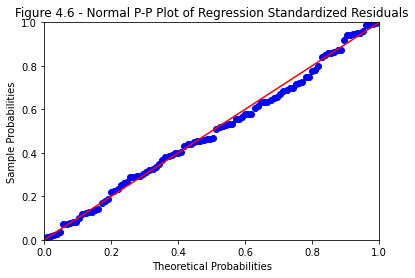

In [138]:
draw_pp_plot( ipl_model_3, 
             "Figure 4.6 - Normal P-P Plot of Regression Standardized Residuals" );

The P-P plot shows the residuals follow approximate normal distribution.

#### Residual Plot

As explained in the previous example, residual plot is a plot between standardized fitted values and residuals. The residuals should be random and centered around 0.  

In [139]:
def plot_resid_fitted( fitted, resid, title):
    plt.scatter( get_standardized_values( fitted ), 
            get_standardized_values( resid ) )
    plt.title( title )
    plt.xlabel( "Standardized predicted values")
    plt.ylabel( "Standardized residual values")    
    plt.show()

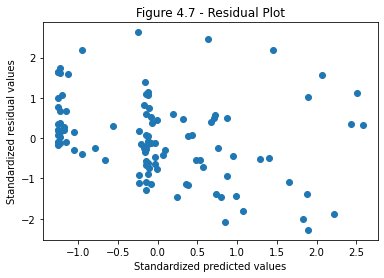

In [140]:
plot_resid_fitted( ipl_model_3.fittedvalues, 
                  ipl_model_3.resid,
                  "Figure 4.7 - Residual Plot")

The residuals do not show any signs of heteroscedasticity (any funnel like pattern).

### Detecting Influencers

Which observations are highly influential in the model? We can plot using *influence_plot()* as explained the previous example. Leverage value of more than $\frac{3(k+1)}{n}$ is treated as highly influential observation. Where *k* is number of variables and *n* is the number of observations.

In [141]:
k = train_X.shape[1]
n = train_X.shape[0]

In [142]:
print( "Number of variables:", k, " and number of observations:", n)

Number of variables: 4  and number of observations: 104


In [143]:
leverage_cutoff = 3*((k + 1)/n) 
print( "Cutoff for leverage value: ", round(leverage_cutoff, 3) )

Cutoff for leverage value:  0.144


So, observations with leverage values more than 0.144 are highly influential.

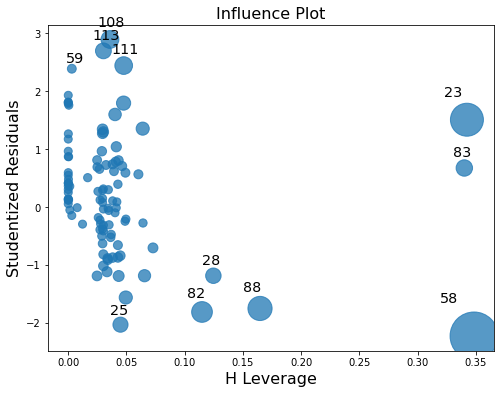

In [145]:
from statsmodels.graphics.regressionplots import influence_plot

fig, ax = plt.subplots( figsize=(8,6) )
influence_plot( ipl_model_3, ax = ax )
plt.show()

The above diagram shows there are three observations *23, 58, 83* have compartive high leverage with residuals. We can filter out the influential observations.

In [146]:
ipl_auction_df[ipl_auction_df.index.isin( [23, 58, 83] )]

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
23,24,"Flintoff, A",2,ENG,CSK,Allrounder,3845,226,3394,88.82,...,116.98,2,105,2,52.50,9.55,33.00,2009,950000,1550000
58,59,"Mascarenhas, AD",2,ENG,RR+,Allrounder,0,0,245,95.33,...,101.37,1,331,19,17.42,7.01,14.95,2011,100000,100000
83,84,"Pietersen, KP",2,ENG,RCB+,Batsman,6654,5,4184,86.76,...,141.20,30,215,7,30.71,7.41,24.86,2009,1350000,1550000


These observations do not have large residuals. So, it may not be necessary to remove these observations. But if the observation need to be removed, the following method *drop()* can be used.

In [147]:
train_X_new = train_X.drop( [23, 58, 83], axis = 0)
train_y_new = train_y.drop( [23, 58, 83], axis = 0)

We will leave the next steps of building a model after removing the influential observations, to the reader to try themselves for practice.

### Transforming Response Variable

Transformation is a process of deriving new dependent and/or independent variables to identify the correct functional form of the regression model. For example, the dependent variable Y may be replaced in the model with ln(Y), , 1/Y, etc. and similarly an independent variable X may be replaced with ln(X), , 1/X etc.

Transformation in MLR is used to address  the following issues:

- Poor fit (low R sqaured value).
- Patten in residual analysis indicating potential non-linear relationship between the dependent and independent variable. 
- Residuals do not follow a normal distribution.
- Residuals are not homoscedastic


We will create a new response variable by taking the square root of the existing values. This can be done by using *numpy's* *sqrt()* method.

In [148]:
train_y = np.sqrt( train_y )

In [149]:
ipl_model_4 = sm.OLS(train_y, train_X).fit()
ipl_model_4.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.741     
Dependent Variable:     SOLD PRICE       AIC:                         1527.9999 
Date:                   2021-03-04 15:17 BIC:                         1538.5775 
No. Observations:       104              Log-Likelihood:              -760.00   
Df Model:               4                F-statistic:                 75.29     
Df Residuals:           100              Prob (F-statistic):          2.63e-29  
R-squared (uncentered): 0.751            Scale:                       1.3550e+05
-----------------------------------------------------------------------------------
                    Coef.      Std.Err.      t       P>|t|      [0.025      0.975] 
-----------------------------------------------------------------------------------
COUNTRY_IND        490.7089     63.9238    7.6765    0.0000    363.8860    617.5318
COUNTRY_ENG        563.0261    217.2801    2.5912    0.0110    131.9486    994.1036
SIXERS               8.5338      1.6995    5.0213    0.0000      5.1620     11.9055
CAPTAINCY EXP_1    417.7575     76.0204    5.4953    0.0000    266.9352    568.5799
--------------------------------------------------------------------------------
Omnibus:                   0.017             Durbin-Watson:                1.879
Prob(Omnibus):             0.992             Jarque-Bera (JB):             0.145
Skew:                      0.005             Prob(JB):                     0.930
Kurtosis:                  2.817             Condition No.:                165  
================================================================================

"""

The r-squard value of the model has increased to 0.751. And the following P-P plot also shows that the residuals follow a normal distribution.

<Figure size 576x432 with 0 Axes>

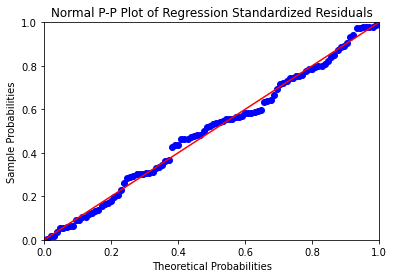

In [154]:
draw_pp_plot( ipl_model_4, 
             "Normal P-P Plot of Regression Standardized Residuals" );

### Making predictions on validation set

After final model is built as per our requirements and the model has passed all diagnostic tests, we can apply model on the validation test data to predict the *SOLD PRICE*.

As the model we have built predicts square root of the *SOLD PRICE*, we need to square the predicted values to get the actual *SOLD PRICE* of the players.

In [151]:
pred_y = np.power( ipl_model_4.predict( test_X[train_X.columns] ), 2)

#### Measuring RMSE

In [152]:
from sklearn import metrics

np.sqrt(metrics.mean_squared_error(pred_y, test_y))

496151.18122558534

#### Measuring R-squared value

In [153]:
np.round( metrics.r2_score(pred_y, test_y), 2 )

0.44

The accuracy (r-squared) value on validation set (0.44) is quite low compared to the accuracy reported by the model on training dataset (0.751). This could the a sign of model overfitting. We will discuss underfitting and overfitting of models and how to deal with it in a later session.

## Lessons Learnt:

1. Linear regression model is used to find existence of association relationship between a dependent variable and more than one independent variables.
2. How to split data into train and validation sets and build models on training set.
3. How to build models using OLS api in statsmodel method and conduct model diagnostics.
4. How to deal with outliers and multi-colliearity.
5. How to measure accuracy using r squared and rmse metrics.